In [1]:
from torchvision.datasets import MNIST, FashionMNIST
from torchvision import transforms

fmnist_train = FashionMNIST("./data", train=True, download=True,
                           transform=transforms.ToTensor())
fmnist_test = FashionMNIST("./data", train=False, download=True,
                           transform=transforms.ToTensor())

mnist_train = MNIST("./data", train=True, download=True,
                    transform=transforms.ToTensor())
mnist_test = MNIST("./data", train=False, download=True,
                    transform=transforms.ToTensor())

batch_size=256
from torch.utils.data import Dataset, DataLoader, TensorDataset
f_train_loader = DataLoader(fmnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
f_test_laoder = DataLoader(fmnist_test, batch_size=batch_size, shuffle=False, drop_last=True)

m_train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
m_test_laoder = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, drop_last=True)

100.0%

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


111.0%

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


100.0%

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


159.1%/home2/dwnusa/workspace/cnnstudy/venv/lib/python3.6/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


100.1%

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


113.5%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


100.4%

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


180.4%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [3]:
from models.load_models import MyMLP, MyCNN, Net, NetWidth, NetDropout, NetBatchNorm, NetDepth

model = MyMLP()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list
print('MyMLP: ', sum(numel_list), numel_list)

model = MyCNN(height=28, width=28)
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list
print('MyCNN: ', sum(numel_list), numel_list)

model = Net(height=28, width=28)
numel_list = [p.numel() for p in model.parameters()]
print('Net: ', sum(numel_list), numel_list)

model = NetWidth(height=28, width=28, n_chans1=32)
numel_list = [p.numel() for p in model.parameters()]
print('NetWidth: ', sum(numel_list), numel_list)

model = NetDropout(height=28, width=28, n_chans1=32)
numel_list = [p.numel() for p in model.parameters()]
print('NetDropout: ', sum(numel_list), numel_list)

model = NetBatchNorm(height=28, width=28, n_chans1=32)
numel_list = [p.numel() for p in model.parameters()]
print('NetBatchNorm: ', sum(numel_list), numel_list)

model = NetDepth(height=28, width=28, n_chans1=32)
numel_list = [p.numel() for p in model.parameters()]
print('NetDepth: ', sum(numel_list), numel_list)

MyMLP:  2778 [2048, 32, 512, 16, 160, 10]
MyCNN:  123222 [400, 16, 12800, 32, 51200, 64, 57600, 100, 1000, 10]
Net:  14226 [144, 16, 1152, 8, 12544, 32, 320, 10]
NetWidth:  30394 [288, 32, 4608, 16, 25088, 32, 320, 10]
NetDropout:  30394 [288, 32, 4608, 16, 25088, 32, 320, 10]
NetBatchNorm:  30490 [288, 32, 32, 32, 4608, 16, 16, 16, 25088, 32, 320, 10]
NetDepth:  12234 [288, 32, 4608, 16, 2304, 16, 4608, 32, 320, 10]


In [6]:
import torch
from torch import nn, optim
from train.run_training import training_loop, training_loop_l2reg, validate
import collections
all_acc_dict = collections.OrderedDict()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import datetime
current_time = datetime.datetime.today() # 2021-08-15 20:58:43.302125
current_time = current_time.strftime('%Y%m%d%H%M%S') # 20210815205827

In [7]:
model = Net(height=28, width=28).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["Net"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_Net.pt')

100%|██████████| 234/234 [00:04<00:00, 56.63it/s]


0 2.2896754731436144 0.1600727831196581 0.34014424681663513


100%|██████████| 234/234 [00:04<00:00, 56.66it/s]


1 2.0854438036808127 0.5723323985042735 0.5849359035491943


100%|██████████| 234/234 [00:04<00:00, 55.39it/s]


2 1.5046891373114524 0.6274205395299145 0.7018229365348816


100%|██████████| 234/234 [00:04<00:00, 53.53it/s]


3 1.0711645678389226 0.7327891292735043 0.7820512652397156


100%|██████████| 234/234 [00:04<00:00, 53.33it/s]


4 0.8369234462664362 0.7957565438034188 0.8269230723381042


100%|██████████| 234/234 [00:04<00:00, 54.56it/s]


5 0.6960779341505321 0.8310964209401709 0.856370210647583


100%|██████████| 234/234 [00:04<00:00, 54.33it/s]


6 0.6028880933579457 0.8517127403846154 0.8720953464508057


100%|██████████| 234/234 [00:04<00:00, 54.59it/s]


7 0.53697079829392 0.8665698450854701 0.8825120329856873


100%|██████████| 234/234 [00:04<00:00, 55.57it/s]


8 0.48799240282165135 0.8761685363247863 0.8904246687889099


100%|██████████| 234/234 [00:05<00:00, 45.94it/s]


9 0.45014275987772473 0.8847155448717948 0.896334171295166
-----------training finished-----------
train_losses:  [2.2896754731436144, 2.0854438036808127, 1.5046891373114524, 1.0711645678389226, 0.8369234462664362, 0.6960779341505321, 0.6028880933579457, 0.53697079829392, 0.48799240282165135, 0.45014275987772473]
train_acc:  [0.1600727831196581, 0.5723323985042735, 0.6274205395299145, 0.7327891292735043, 0.7957565438034188, 0.8310964209401709, 0.8517127403846154, 0.8665698450854701, 0.8761685363247863, 0.8847155448717948]
val_acc:  [0.34014424681663513, 0.5849359035491943, 0.7018229365348816, 0.7820512652397156, 0.8269230723381042, 0.856370210647583, 0.8720953464508057, 0.8825120329856873, 0.8904246687889099, 0.896334171295166]
Accuracy train: 0.89
Accuracy val: 0.90


In [8]:
model = MyCNN(height=28, width=28).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["MyCNN"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_MyCNN.pt')

100%|██████████| 234/234 [00:04<00:00, 46.92it/s]


0 2.309183130960096 0.12428218482905982 0.13671875


100%|██████████| 234/234 [00:04<00:00, 46.82it/s]


1 2.2706608629022034 0.31640625 0.5044070482254028


100%|██████████| 234/234 [00:04<00:00, 47.15it/s]


2 1.2380531936756018 0.66015625 0.8334335088729858


100%|██████████| 234/234 [00:05<00:00, 46.43it/s]


3 0.4647430618945109 0.8543336004273504 0.8988381624221802


100%|██████████| 234/234 [00:05<00:00, 46.13it/s]


4 0.31816179532349875 0.9022102029914529 0.9230769276618958


100%|██████████| 234/234 [00:05<00:00, 46.68it/s]


5 0.24293394648977615 0.9258146367521367 0.9392027258872986


100%|██████████| 234/234 [00:05<00:00, 46.70it/s]


6 0.1945332593480405 0.9404213408119658 0.9530248641967773


100%|██████████| 234/234 [00:05<00:00, 46.37it/s]


7 0.1685333388493808 0.9485009348290598 0.9562299847602844


100%|██████████| 234/234 [00:05<00:00, 46.56it/s]


8 0.1445047904621378 0.955345219017094 0.9559295177459717


100%|██████████| 234/234 [00:04<00:00, 47.02it/s]


9 0.12927763475816648 0.9603031517094017 0.9673477411270142
-----------training finished-----------
train_losses:  [2.309183130960096, 2.2706608629022034, 1.2380531936756018, 0.4647430618945109, 0.31816179532349875, 0.24293394648977615, 0.1945332593480405, 0.1685333388493808, 0.1445047904621378, 0.12927763475816648]
train_acc:  [0.12428218482905982, 0.31640625, 0.66015625, 0.8543336004273504, 0.9022102029914529, 0.9258146367521367, 0.9404213408119658, 0.9485009348290598, 0.955345219017094, 0.9603031517094017]
val_acc:  [0.13671875, 0.5044070482254028, 0.8334335088729858, 0.8988381624221802, 0.9230769276618958, 0.9392027258872986, 0.9530248641967773, 0.9562299847602844, 0.9559295177459717, 0.9673477411270142]
Accuracy train: 0.96
Accuracy val: 0.97


In [9]:
model = NetWidth(height=28, width=28, n_chans1=32).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["NetWidth"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_NetWidth.pt')

100%|██████████| 234/234 [00:04<00:00, 56.13it/s]


0 2.271206937634382 0.29333600427350426 0.5671073794364929


100%|██████████| 234/234 [00:04<00:00, 54.59it/s]


1 1.877593821722039 0.6656817574786325 0.7561097741127014


100%|██████████| 234/234 [00:04<00:00, 54.07it/s]


2 1.1192165976430213 0.7813334668803419 0.8322315812110901


100%|██████████| 234/234 [00:04<00:00, 54.58it/s]


3 0.7425508174261821 0.8452857905982906 0.8742988705635071


100%|██████████| 234/234 [00:04<00:00, 54.28it/s]


4 0.5628123154200197 0.8768195779914529 0.8943309187889099


100%|██████████| 234/234 [00:04<00:00, 54.62it/s]


5 0.4616207754151504 0.8945980235042735 0.9086538553237915


100%|██████████| 234/234 [00:04<00:00, 54.67it/s]


6 0.39786761564246576 0.9052984775641025 0.9155648946762085


100%|██████████| 234/234 [00:04<00:00, 54.72it/s]


7 0.3538755376707331 0.9134782318376068 0.9229767918586731


100%|██████████| 234/234 [00:04<00:00, 56.89it/s]


8 0.3209458305600375 0.9203725961538461 0.9289863705635071


100%|██████████| 234/234 [00:04<00:00, 55.48it/s]


9 0.2949437025790562 0.9252971420940171 0.9326923489570618
-----------training finished-----------
train_losses:  [2.271206937634382, 1.877593821722039, 1.1192165976430213, 0.7425508174261821, 0.5628123154200197, 0.4616207754151504, 0.39786761564246576, 0.3538755376707331, 0.3209458305600375, 0.2949437025790562]
train_acc:  [0.29333600427350426, 0.6656817574786325, 0.7813334668803419, 0.8452857905982906, 0.8768195779914529, 0.8945980235042735, 0.9052984775641025, 0.9134782318376068, 0.9203725961538461, 0.9252971420940171]
val_acc:  [0.5671073794364929, 0.7561097741127014, 0.8322315812110901, 0.8742988705635071, 0.8943309187889099, 0.9086538553237915, 0.9155648946762085, 0.9229767918586731, 0.9289863705635071, 0.9326923489570618]
Accuracy train: 0.93
Accuracy val: 0.93


In [10]:
model = NetWidth(height=28, width=28, n_chans1=32).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop_l2reg(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["l2 reg"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_NetWidth(l2 reg).pt')

100%|██████████| 234/234 [00:04<00:00, 51.11it/s]


0 2.2821317036264444 0.25964877136752135 0.6420272588729858


100%|██████████| 234/234 [00:04<00:00, 51.10it/s]


1 1.7602279201597615 0.6820245726495726 0.7474960088729858


100%|██████████| 234/234 [00:04<00:00, 51.10it/s]


2 1.1001809231713093 0.7773103632478633 0.8280248641967773


100%|██████████| 234/234 [00:04<00:00, 50.49it/s]


3 0.7910801486907599 0.840995592948718 0.8684896230697632


100%|██████████| 234/234 [00:04<00:00, 50.71it/s]


4 0.6341500919264274 0.8704427083333334 0.8887219429016113


100%|██████████| 234/234 [00:04<00:00, 51.31it/s]


5 0.5426692224623307 0.8867521367521367 0.8989382982254028


100%|██████████| 234/234 [00:04<00:00, 49.66it/s]


6 0.48379290717865775 0.8980201655982906 0.907151460647583


100%|██████████| 234/234 [00:04<00:00, 49.16it/s]


7 0.44225083451414315 0.9064169337606838 0.9151642918586731


100%|██████████| 234/234 [00:04<00:00, 49.90it/s]


8 0.4114752740563241 0.9131610576923077 0.9205729365348816


100%|██████████| 234/234 [00:04<00:00, 50.41it/s]


9 0.38729936204243115 0.9179186698717948 0.926682710647583
-----------training finished-----------
train_losses:  [2.2821317036264444, 1.7602279201597615, 1.1001809231713093, 0.7910801486907599, 0.6341500919264274, 0.5426692224623307, 0.48379290717865775, 0.44225083451414315, 0.4114752740563241, 0.38729936204243115]
train_acc:  [0.25964877136752135, 0.6820245726495726, 0.7773103632478633, 0.840995592948718, 0.8704427083333334, 0.8867521367521367, 0.8980201655982906, 0.9064169337606838, 0.9131610576923077, 0.9179186698717948]
val_acc:  [0.6420272588729858, 0.7474960088729858, 0.8280248641967773, 0.8684896230697632, 0.8887219429016113, 0.8989382982254028, 0.907151460647583, 0.9151642918586731, 0.9205729365348816, 0.926682710647583]
Accuracy train: 0.92
Accuracy val: 0.93


In [11]:
model = NetDropout(height=28, width=28, n_chans1=32).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["dropout"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_NetDropout.pt')

100%|██████████| 234/234 [00:04<00:00, 53.90it/s]


0 2.235846331191165 0.23818108974358973 0.5561898946762085


100%|██████████| 234/234 [00:04<00:00, 54.37it/s]


1 1.7345726791881184 0.5919304220085471 0.7051281929016113


100%|██████████| 234/234 [00:04<00:00, 56.72it/s]


2 1.1698789046557676 0.7302350427350427 0.7914663553237915


100%|██████████| 234/234 [00:04<00:00, 54.17it/s]


3 0.8637586885767433 0.8009147970085471 0.8390424847602844


100%|██████████| 234/234 [00:04<00:00, 54.49it/s]


4 0.6932342382459682 0.835670405982906 0.8633814454078674


100%|██████████| 234/234 [00:04<00:00, 54.80it/s]


5 0.5887557608375222 0.8564035790598291 0.8788061141967773


100%|██████████| 234/234 [00:04<00:00, 55.32it/s]


6 0.5214901901621676 0.8694744925213675 0.8854166865348816


100%|██████████| 234/234 [00:04<00:00, 56.09it/s]


7 0.47486540137954025 0.8761351495726496 0.8912259936332703


100%|██████████| 234/234 [00:04<00:00, 54.97it/s]


8 0.43928153154164423 0.8835803952991453 0.8976362347602844


100%|██████████| 234/234 [00:04<00:00, 54.66it/s]


9 0.411029663848263 0.8904580662393162 0.9019431471824646
-----------training finished-----------
train_losses:  [2.235846331191165, 1.7345726791881184, 1.1698789046557676, 0.8637586885767433, 0.6932342382459682, 0.5887557608375222, 0.5214901901621676, 0.47486540137954025, 0.43928153154164423, 0.411029663848263]
train_acc:  [0.23818108974358973, 0.5919304220085471, 0.7302350427350427, 0.8009147970085471, 0.835670405982906, 0.8564035790598291, 0.8694744925213675, 0.8761351495726496, 0.8835803952991453, 0.8904580662393162]
val_acc:  [0.5561898946762085, 0.7051281929016113, 0.7914663553237915, 0.8390424847602844, 0.8633814454078674, 0.8788061141967773, 0.8854166865348816, 0.8912259936332703, 0.8976362347602844, 0.9019431471824646]
Accuracy train: 0.90
Accuracy val: 0.90


In [12]:
model = NetBatchNorm(height=28, width=28, n_chans1=32).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["NetBatchNorm"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_NetBatchNorm.pt')

100%|██████████| 234/234 [00:04<00:00, 54.55it/s]


0 1.553497142034539 0.6835603632478633 0.828125


100%|██████████| 234/234 [00:04<00:00, 54.26it/s]


1 0.8415276513079205 0.8502270299145299 0.8884214758872986


100%|██████████| 234/234 [00:04<00:00, 52.32it/s]


2 0.5546359766450563 0.8971354166666666 0.9192708730697632


100%|██████████| 234/234 [00:04<00:00, 53.12it/s]


3 0.4008929598996568 0.9231770833333334 0.9345953464508057


100%|██████████| 234/234 [00:04<00:00, 54.38it/s]


4 0.31288469470877506 0.937767094017094 0.9461137652397156


100%|██████████| 234/234 [00:04<00:00, 54.43it/s]


5 0.2578702565810199 0.9471487713675214 0.9547275900840759


100%|██████████| 234/234 [00:04<00:00, 54.31it/s]


6 0.22010200576209205 0.954276842948718 0.958834171295166


100%|██████████| 234/234 [00:04<00:00, 53.26it/s]


7 0.19283434652719375 0.959518563034188 0.9638421535491943


100%|██████████| 234/234 [00:04<00:00, 53.77it/s]


8 0.17179391325287552 0.9633747329059829 0.9665464758872986


100%|██████████| 234/234 [00:04<00:00, 53.60it/s]


9 0.1556627163943303 0.9658286591880342 0.9693509936332703
-----------training finished-----------
train_losses:  [1.553497142034539, 0.8415276513079205, 0.5546359766450563, 0.4008929598996568, 0.31288469470877506, 0.2578702565810199, 0.22010200576209205, 0.19283434652719375, 0.17179391325287552, 0.1556627163943303]
train_acc:  [0.6835603632478633, 0.8502270299145299, 0.8971354166666666, 0.9231770833333334, 0.937767094017094, 0.9471487713675214, 0.954276842948718, 0.959518563034188, 0.9633747329059829, 0.9658286591880342]
val_acc:  [0.828125, 0.8884214758872986, 0.9192708730697632, 0.9345953464508057, 0.9461137652397156, 0.9547275900840759, 0.958834171295166, 0.9638421535491943, 0.9665464758872986, 0.9693509936332703]
Accuracy train: 0.97
Accuracy val: 0.97


In [13]:
model = NetDepth(height=28, width=28, n_chans1=32).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn, 
    train_loader = m_train_loader, 
    test_loader = m_test_laoder, 
    device = device)

all_acc_dict["NetDepth"] = validate(model, m_train_loader, m_test_laoder, device)
torch.save(model.state_dict(), './results/' + f'{current_time}_NetDepth.pt')

100%|██████████| 234/234 [00:04<00:00, 54.05it/s]


0 2.316341629355762 0.12281316773504274 0.15014022588729858


100%|██████████| 234/234 [00:04<00:00, 54.26it/s]


1 2.308049464942048 0.11024305555555555 0.10236378014087677


100%|██████████| 234/234 [00:04<00:00, 54.13it/s]


2 2.296363454008307 0.10381610576923077 0.10797275602817535


100%|██████████| 234/234 [00:04<00:00, 53.77it/s]


3 2.2661823919402684 0.18821781517094016 0.30568909645080566


100%|██████████| 234/234 [00:04<00:00, 53.70it/s]


4 2.041921207833188 0.4271000267094017 0.6113781929016113


100%|██████████| 234/234 [00:04<00:00, 54.11it/s]


5 0.9480666684490416 0.7235076121794872 0.7953726053237915


100%|██████████| 234/234 [00:04<00:00, 54.62it/s]


6 0.5801091822176021 0.8127504006410257 0.8130007982254028


100%|██████████| 234/234 [00:04<00:00, 53.53it/s]


7 0.43965112817645585 0.8624298878205128 0.8739984035491943


100%|██████████| 234/234 [00:04<00:00, 54.52it/s]


8 0.35380235160880846 0.8902243589743589 0.9117588400840759


100%|██████████| 234/234 [00:04<00:00, 54.00it/s]


9 0.29764934446934466 0.9074352297008547 0.9152644276618958
-----------training finished-----------
train_losses:  [2.316341629355762, 2.308049464942048, 2.296363454008307, 2.2661823919402684, 2.041921207833188, 0.9480666684490416, 0.5801091822176021, 0.43965112817645585, 0.35380235160880846, 0.29764934446934466]
train_acc:  [0.12281316773504274, 0.11024305555555555, 0.10381610576923077, 0.18821781517094016, 0.4271000267094017, 0.7235076121794872, 0.8127504006410257, 0.8624298878205128, 0.8902243589743589, 0.9074352297008547]
val_acc:  [0.15014022588729858, 0.10236378014087677, 0.10797275602817535, 0.30568909645080566, 0.6113781929016113, 0.7953726053237915, 0.8130007982254028, 0.8739984035491943, 0.9117588400840759, 0.9152644276618958]
Accuracy train: 0.91
Accuracy val: 0.92


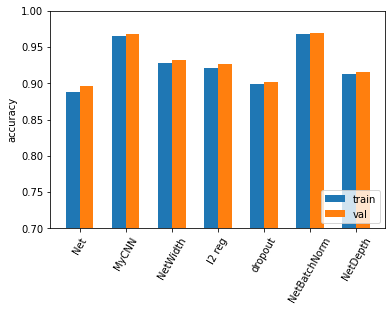

In [14]:
from utils.load_utils import compare_validations
compare_validations(current_time, all_acc_dict)